In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from differentiable_lensing import DifferentiableLensing
import differentiable_lensing
import data

In [2]:
device = 'cpu'

Initialising the DifferentiableLensing module to a lower resolution for the purposes of demonstration

In [3]:
shape = 64
lensing_module = DifferentiableLensing('cpu', target_resolution=0.101, target_shape=shape, alpha=None)
theta_e = 3
theta_x, theta_y, theta_x_as, theta_y_as = lensing_module.make_center_grid(-0.101 * shape / 2.0, 0.101 * shape / 2.0, shape)
theta_x_as, theta_y_as = theta_x_as.unsqueeze(0), theta_y_as.unsqueeze(0)
alpha = lensing_module.construct_sis(theta_x_as, theta_y_as, theta_e)
beta_x, beta_y = lensing_module.backward_lensing(theta_x_as, theta_y_as, alpha)

In [4]:
cg_to_log = torch.load('scatter_to_log_64.pt')
cg_forward_from_log = torch.load('forward_from_log_64.pt')
cg_from_log = torch.load('scatter_from_log_64.pt')
cg_backward = torch.load('sparse_grid_fracs_euclid_backward.pt')

Loading datasets

In [5]:
ones_LR = torch.ones(1, 1, shape, shape, dtype=torch.float32, device=device)

Reconstructing sources

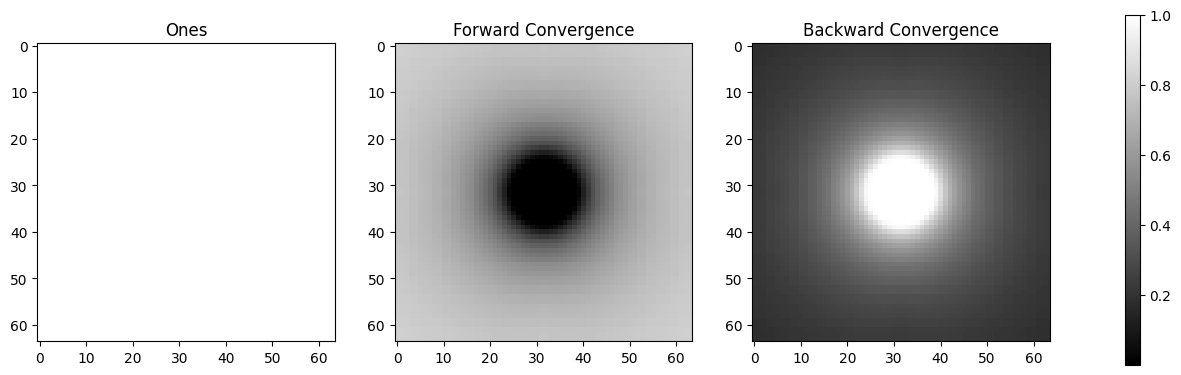

In [6]:
image_convergence = lensing_module.cross_grid_fill(ones_LR, [cg_to_log, cg_forward_from_log, cg_from_log])
source_convergence = lensing_module.cross_grid_fill(ones_LR, [cg_backward])
plot, axes = differentiable_lensing.shared_colorimshow([ones_LR[0,0], image_convergence[0,0], 1-image_convergence[0,0]], nrows=1, ncols=3, cmap='grey', set_title=['Ones', 'Forward Convergence', 'Backward Convergence'])

In [8]:
torch.save((1-image_convergence[0,0]), 'source_convergence_map.pt')
torch.save((image_convergence[0,0]), 'image_convergence_map.pt')